In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import seaborn as sns
import missingno as msno
import plotly.express as px
import  matplotlib.pyplot as plt


plt.style.use('seaborn')
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# EDA
* Outecome Percent
* Outcome per BloodPressure / Age 3D plot
* Outcome per Each Columns Distplot
* Outlier

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


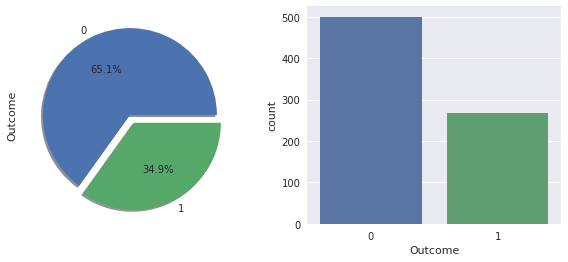

In [7]:
f,ax=plt.subplots(1,2,figsize=(10,4))

df['Outcome'].value_counts().plot.pie(
    explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True
)
sns.countplot('Outcome',data=df,ax=ax[1])

plt.show()

<AxesSubplot:>

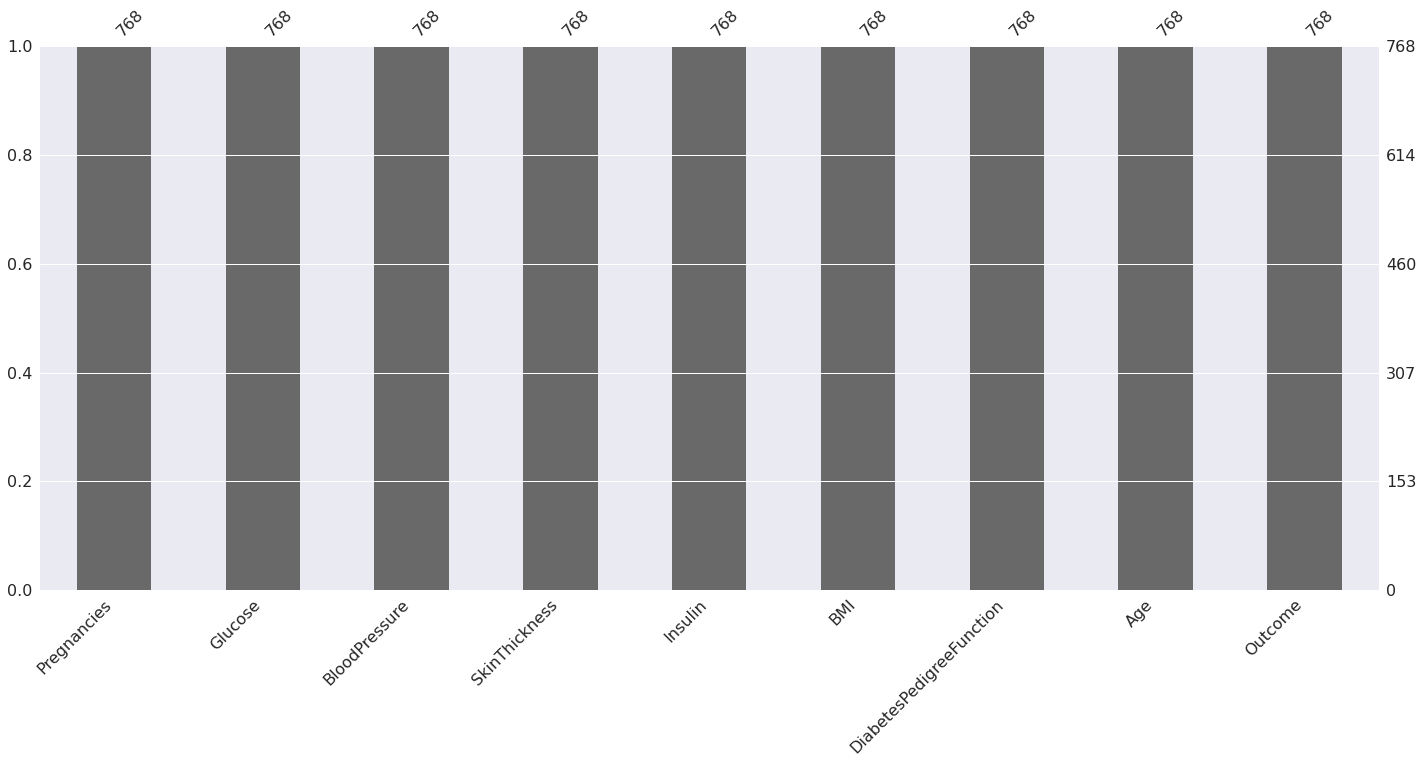

In [8]:
msno.bar(df)

In [9]:
pd.DataFrame(df.isnull().sum(), columns=["Null Count"])

,Null Count
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
fig = px.scatter_3d(df, x='BloodPressure', y='Outcome', z='Age',
                    color='Age')
fig.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



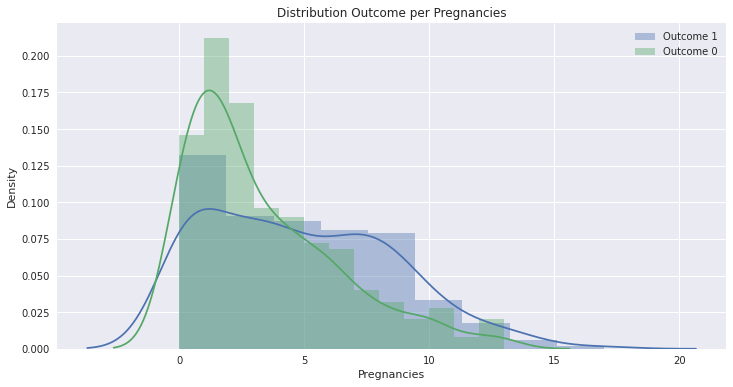

In [11]:
plt.figure(figsize=(12,6))
plt.title("Distribution Outcome per Pregnancies")
sns.distplot(df[df['Outcome']==1]['Pregnancies'], label='Outcome 1')
sns.distplot(df[df['Outcome']==0]['Pregnancies'], label='Outcome 0')
plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



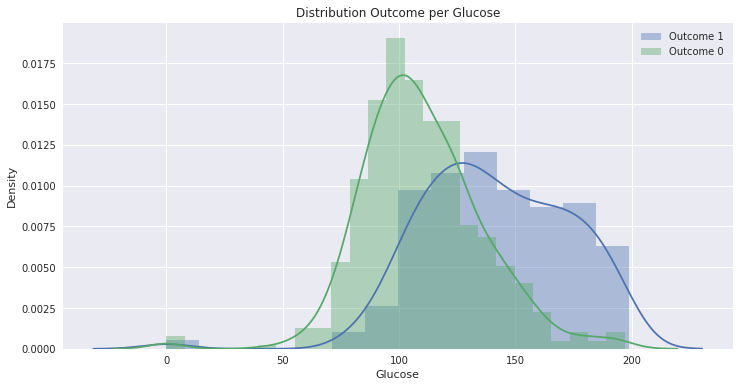

In [12]:
plt.figure(figsize=(12,6))
plt.title("Distribution Outcome per Glucose")
sns.distplot(df[df['Outcome']==1]['Glucose'], label='Outcome 1')
sns.distplot(df[df['Outcome']==0]['Glucose'], label='Outcome 0')
plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



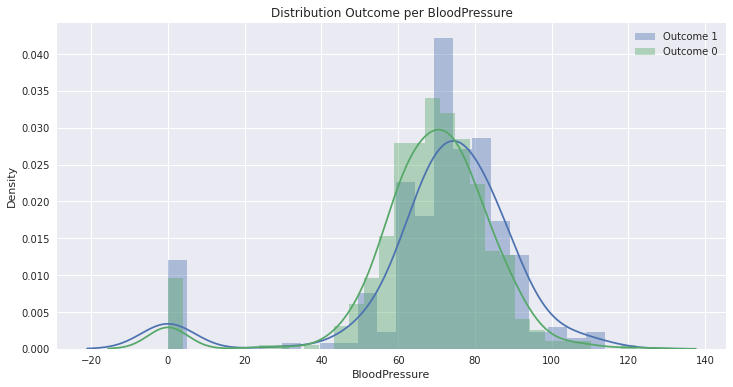

In [13]:
plt.figure(figsize=(12,6))
plt.title("Distribution Outcome per BloodPressure")
sns.distplot(df[df['Outcome']==1]['BloodPressure'], label='Outcome 1')
sns.distplot(df[df['Outcome']==0]['BloodPressure'], label='Outcome 0')
plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



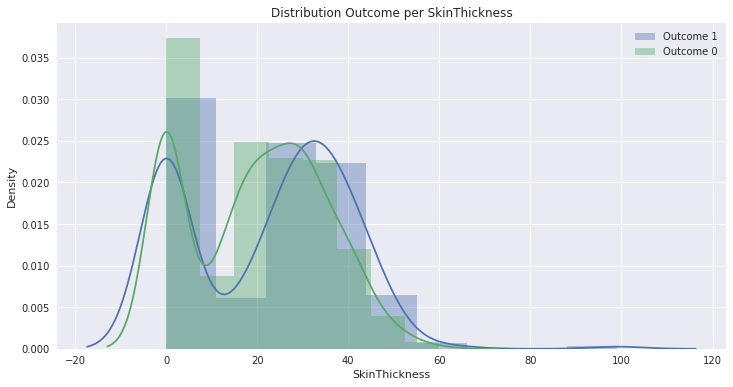

In [14]:
plt.figure(figsize=(12,6))
plt.title("Distribution Outcome per SkinThickness")
sns.distplot(df[df['Outcome']==1]['SkinThickness'], label='Outcome 1')
sns.distplot(df[df['Outcome']==0]['SkinThickness'], label='Outcome 0')
plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



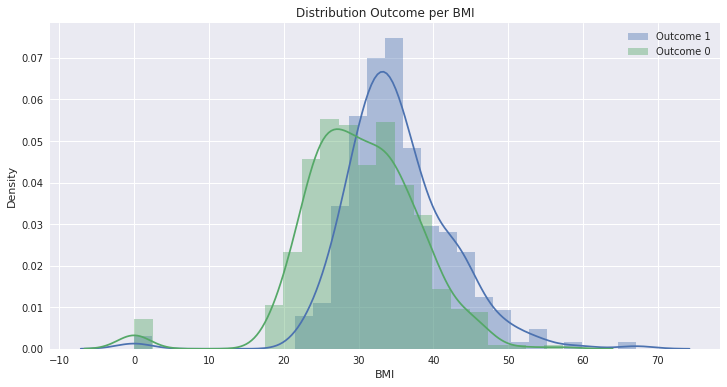

In [15]:
plt.figure(figsize=(12,6))
plt.title("Distribution Outcome per BMI")
sns.distplot(df[df['Outcome']==1]['BMI'], label='Outcome 1')
sns.distplot(df[df['Outcome']==0]['BMI'], label='Outcome 0')
plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



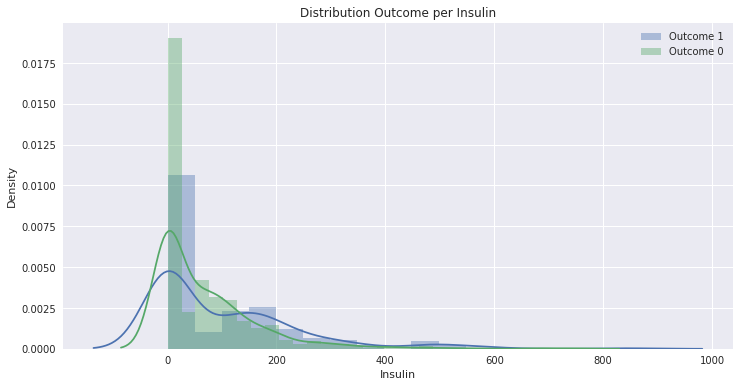

In [16]:
plt.figure(figsize=(12,6))
plt.title("Distribution Outcome per Insulin")
sns.distplot(df[df['Outcome']==1]['Insulin'], label='Outcome 1')
sns.distplot(df[df['Outcome']==0]['Insulin'], label='Outcome 0')
plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



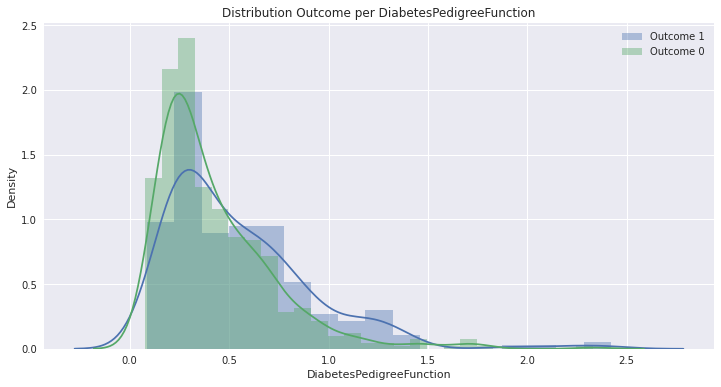

In [17]:
plt.figure(figsize=(12,6))
plt.title("Distribution Outcome per DiabetesPedigreeFunction")
sns.distplot(df[df['Outcome']==1]['DiabetesPedigreeFunction'], label='Outcome 1')
sns.distplot(df[df['Outcome']==0]['DiabetesPedigreeFunction'], label='Outcome 0')
plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



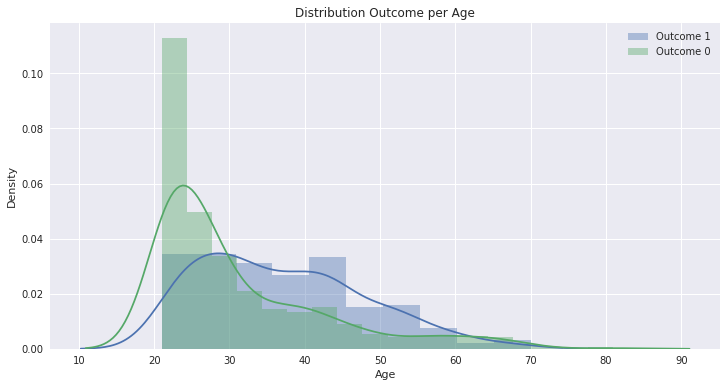

In [18]:
plt.figure(figsize=(12,6))
plt.title("Distribution Outcome per Age")
sns.distplot(df[df['Outcome']==1]['Age'], label='Outcome 1')
sns.distplot(df[df['Outcome']==0]['Age'], label='Outcome 0')
plt.legend()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbc1c563a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbc1c568350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbc1c563790>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbc1c568c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbc1c576090>],
 'means': []}

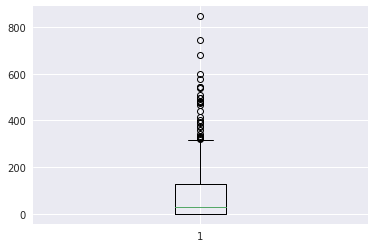

In [19]:
plt.boxplot(df['Insulin'])

In [20]:
df[df.columns[:8]].corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


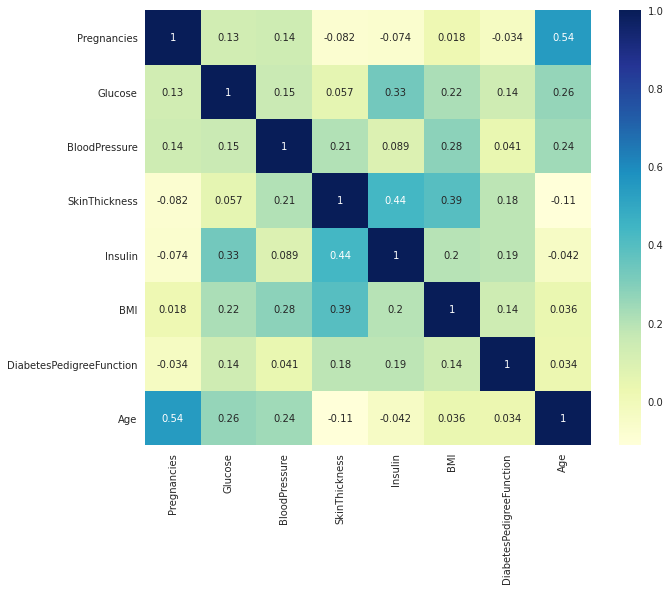

In [21]:
sns.heatmap(df[df.columns[:8]].corr(),annot=True,cmap='YlGnBu')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Preprocessing
* Drop [Insulin>400] Data

In [22]:
df = df[df['Insulin']<=400]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
print('After Drop Insulin DataFrame Shape : ',df.shape)

After Drop Insulin DataFrame Shape :  (748, 9)


# Feature Engineering
* Get Useful Columns
* OverSampling [SMOTE]

In [24]:
features = ['Glucose','BloodPressure','Insulin','BMI','Age']

In [25]:
x = df[features]
y = df['Outcome']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [27]:
x_train.head()

,Glucose,BloodPressure,Insulin,BMI,Age
746,147,94,0,49.3,27
208,96,64,87,33.2,21
69,146,85,100,28.9,27
9,125,96,0,0.0,54
54,150,66,342,34.7,42


In [28]:
y_train.head()

746    1
208    0
69     0
9      1
54     0
Name: Outcome, dtype: int64

In [29]:
smote = SMOTE()
x_over, y_over = smote.fit_resample(x_train,y_train)

In [30]:
x_over.shape

(774, 5)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



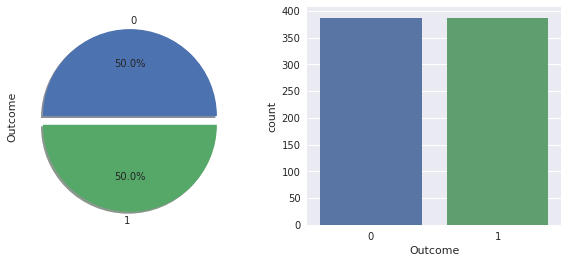

In [31]:
f,ax=plt.subplots(1,2,figsize=(10,4))

y_over.value_counts().plot.pie(
    explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True
)
sns.countplot(y_over,ax=ax[1])

plt.show()

# Modeling
* Normal "x_train", "y_train" Data Modeling
* Applied SMOTE "x_over", "y_over" Data Modeling

#### => WE Will Use
* LogisticRegression
* RandomForest
* LightGBM

In [32]:
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuacy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('confusion')
    print(confusion)
    print('accuacy : {}'.format(np.around(accuacy,4)))
    print('precision: {}'.format(np.around(precision,4)))
    print('recall : {}'.format(np.around(recall,4)))
    print('F1 : {}'.format(np.around(f1,4)))  
    print('ROC_AUC : {}'.format(np.around(roc_auc,4)))

* LogisticRegression / RandomForestClassifier

In [33]:
lg_reg = LogisticRegression()

lg_reg.fit(x_train, y_train)
pred = lg_reg.predict(x_test)
pred_proba = lg_reg.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

confusion
[[92 13]
 [19 26]]
accuacy : 0.7867
precision: 0.6667
recall : 0.5778
F1 : 0.619
ROC_AUC : 0.8161


In [34]:
rf_clf = RandomForestClassifier()
param = {'n_estimators' : [100],
         'max_depth':[8,9,10],
         'min_samples_split':[2,5,7],
         'min_samples_leaf':[6.5,7,7.5]
        }

In [35]:
grid = GridSearchCV(rf_clf,param_grid = param,scoring = 'accuracy',cv=5)
grid.fit(x_train ,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobl

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10],
                         'min_samples_leaf': [6.5, 7, 7.5],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [100]},
             scoring='accuracy')

In [36]:
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'n_estimators': 100}

In [37]:
grid.best_score_

0.7692577030812325

In [38]:
pred = grid.predict(x_test)
pred_proba = grid.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

confusion
[[91 14]
 [17 28]]
accuacy : 0.7933
precision: 0.6667
recall : 0.6222
F1 : 0.6437
ROC_AUC : 0.8353


In [39]:
lg_reg = LogisticRegression()

lg_reg.fit(x_over, y_over)
pred = lg_reg.predict(x_test)
pred_proba = lg_reg.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

confusion
[[79 26]
 [13 32]]
accuacy : 0.74
precision: 0.5517
recall : 0.7111
F1 : 0.6214
ROC_AUC : 0.8142


In [40]:
rf_clf = RandomForestClassifier()
param = {'n_estimators' : [200],
         'max_depth':[10],
         'min_samples_split':[2],
         'min_samples_leaf':[7]
        }

In [41]:
grid = GridSearchCV(rf_clf,param_grid = param,scoring = 'accuracy',cv=5)
grid.fit(x_over ,y_over)

pred = grid.predict(x_test)
pred_proba = grid.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

confusion
[[81 24]
 [ 7 38]]
accuacy : 0.7933
precision: 0.6129
recall : 0.8444
F1 : 0.7103
ROC_AUC : 0.837


* LightGBM Classifier

In [42]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

In [43]:
train_data = lgb.Dataset(x_train, label=y_train)
val_data = lgb.Dataset(x_test, label=y_test)
params = {
    'n_estimators': 5000,
    'num_leaves': 20,
    'max_depth': -1,
    'min_data_in_leaf': 60,
    'learning_rate': 0.01,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'Is_training_metric': True,
    'n_jobs': -1
}

In [44]:
model = lgb.LGBMClassifier(
    n_estimators=400,
    num_leaves=20,
    min_data_in_leaf=60,
    learning_rate=0.01,
    boosting='gbdt',
    objective='binary',
    metric='auc',
    Is_training_metric=True,
    n_jobs=-1
)

In [45]:
model.fit(x_train,y_train)

[LightGBM] [Warning] Unknown parameter: Is_training_metric
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


LGBMClassifier(Is_training_metric=True, boosting='gbdt', learning_rate=0.01,
               metric='auc', min_data_in_leaf=60, n_estimators=400,
               num_leaves=20, objective='binary')

In [46]:
pred = model.predict(x_test)
pred_proba = model.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

confusion
[[44  6]
 [12 13]]
accuacy : 0.76
precision: 0.6842
recall : 0.52
F1 : 0.5909
ROC_AUC : 0.8328


In [47]:
model = lgb.LGBMClassifier(
    n_estimators=400,
    num_leaves=20,
    min_data_in_leaf=60,
    learning_rate=0.01,
    boosting='gbdt',
    objective='binary',
    metric='auc',
    Is_training_metric=True,
    n_jobs=-1
)

In [48]:
model.fit(x_over,y_over)

[LightGBM] [Warning] Unknown parameter: Is_training_metric
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


LGBMClassifier(Is_training_metric=True, boosting='gbdt', learning_rate=0.01,
               metric='auc', min_data_in_leaf=60, n_estimators=400,
               num_leaves=20, objective='binary')

In [49]:
pred = model.predict(x_test)
pred_proba = model.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

confusion
[[42  8]
 [ 8 17]]
accuacy : 0.7867
precision: 0.68
recall : 0.68
F1 : 0.68
ROC_AUC : 0.8296


# Submission

In [50]:
submission = pd.DataFrame(x_test)
submission['Outcome'] = y_test
submission['Predict_Outcome'] = pred

In [51]:
submission.head()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome,Predict_Outcome
345,126,88,108,38.5,49,0,1
296,146,70,360,28.0,29,1,0
506,180,90,90,36.5,35,1,1
482,85,58,49,27.8,28,0,0
503,94,64,79,33.3,41,0,0


### THX to Reading My Notebook🌈